In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import pearsonr
from statsmodels.tsa.seasonal import seasonal_decompose


path = os.getcwd() + "\Datasets\\"
#print(os.listdir())
df = pd.read_csv("Indicator.csv")
df.head()
indicator_csvs = [path + i for i in df.Indicator_Code]
df1 = ["\\".join(i.split("\\")) for i in indicator_csvs]
#print(df1)
#To get the population growth CSV
pop_grow = pd.read_csv(df1[0] + "\\" + os.listdir(df1[0])[0])#, sep='delimiter',header=None)#, error_bad_lines=False)

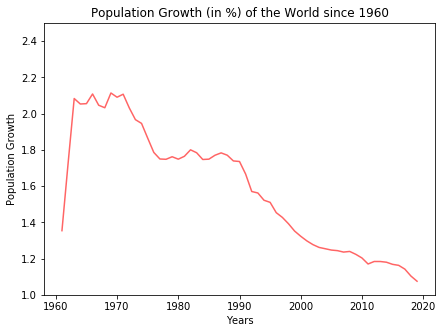

In [24]:
growthWorld = pop_grow[pop_grow["Country Name"]=="World"].iloc[:,5:]
growthWorld.head()

time = [int(i) for i in growthWorld]

plt.figure(figsize=(7,5))
plt.ylim(1,2.5)
plt.ylabel("Population Growth")
plt.xlabel("Years")
plt.title("Population Growth (in %) of the World since 1960")
plt.plot(time,growthWorld.iloc[0,:],color="#ff6565")
plt.show()

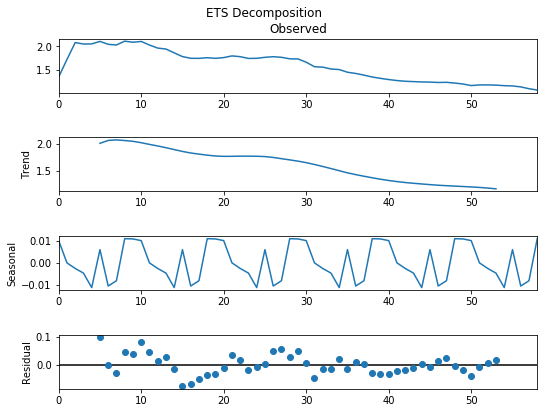

In [58]:
gw = {}
gw["time"] = time
gw["popGrowth"] = growthWorld.iloc[0,:]

gw = pd.DataFrame(gw, columns=["time","popGrowth"])
decompose = seasonal_decompose(gw.popGrowth.values,freq = 10)
ETSPlot = decompose.plot()
ETSPlot.set_figheight(6)
ETSPlot.set_figwidth(8)
ETSPlot.suptitle("ETS Decomposition")
ETSPlot.show()


The above ETS decomposition shows that there is significant trend and seasonality in the data, implying that the time signal is not stationary.

In [59]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

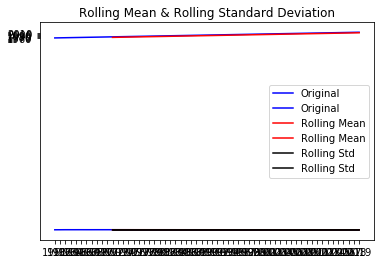

In [64]:
rolling_mean = gw.rolling(window = 12).mean()
rolling_std = gw.rolling(window = 12).std()
plt.plot(gw, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.yticks(np.arange(1960,2020,step = 10))
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [65]:
result = adfuller(gw['popGrowth'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -0.15646376671526777
p-value: 0.9435159537441833
Critical Values:
	1%: -3.5745892596209488
	5%: -2.9239543084490744
	10%: -2.6000391840277777


The p-value of the resulting Augmented Dickey Fuller test is much higher than 0.05, which also proves the non-stationarity of the model. Due to this, for any forecasting, the ARIMA model has to be used.